<a href="https://colab.research.google.com/github/iresh-rajitha/Best-sinhala-transformer-model/blob/main/Sinhala_Text_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

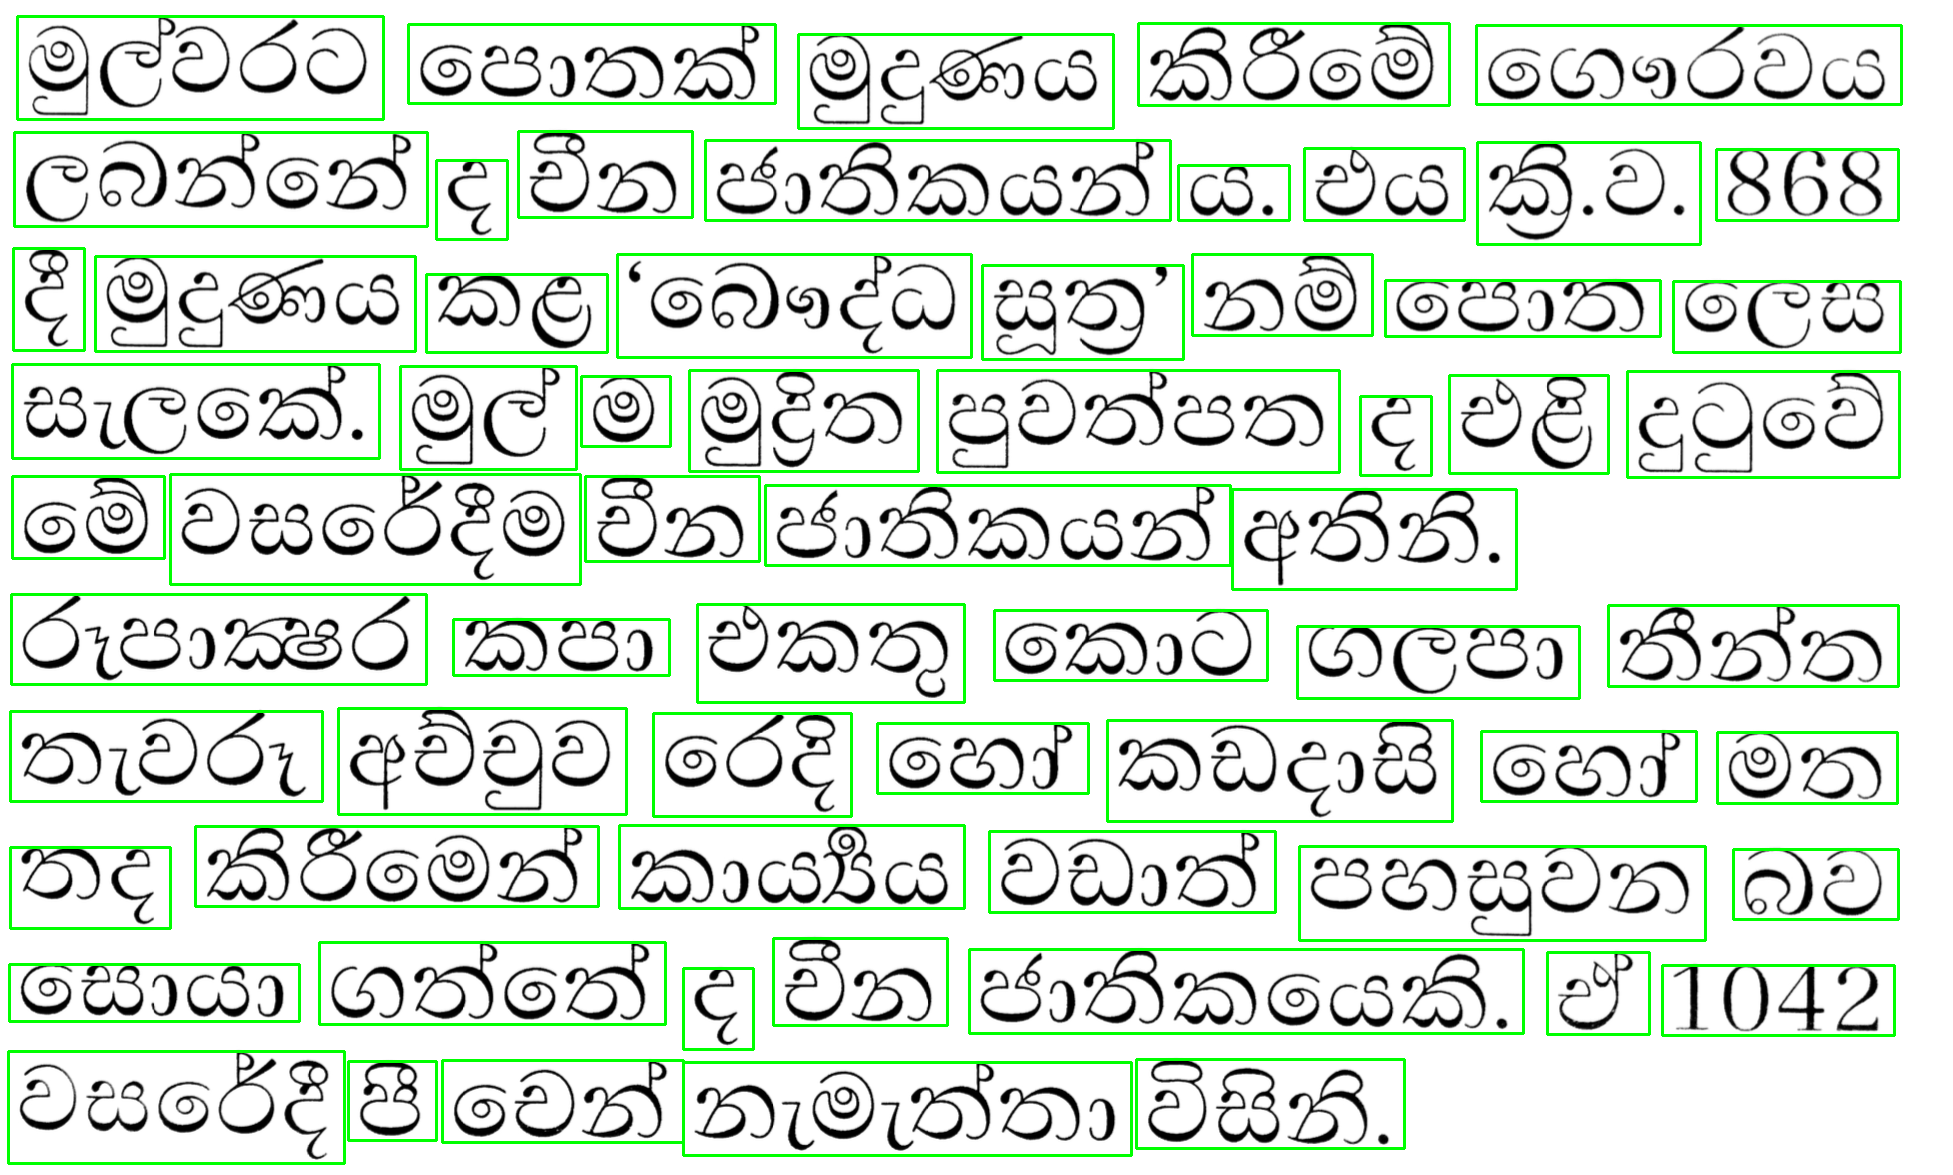

In [2]:
#@title { vertical-output: true}
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Step 1: Preprocess the image
image = cv2.imread('1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Step 2: Detect text blocks using contours
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8,2))
dilate = cv2.dilate(thresh, kernel, iterations=4)
contours, _ = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected blocks
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Step 3: Segment lines within each block using projection profile
# Loop over each detected block
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    block = thresh[y:y+h, x:x+w]

    # Horizontal projection for line segmentation
    horizontal_projection = np.sum(block, axis=1)
    # Apply your custom thresholding to split into lines

    # Step 4: Segment words within each line using vertical projection profile
    # Same as above but for each line

# Display the image with bounding boxes
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
def render_image(image):
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [4]:
def contour_generate(thresh ,col,row):
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,2))
  line_dilate = cv2.dilate(thresh, kernel, iterations=4)
  line_contours, _ = cv2.findContours(line_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  return line_contours

In [32]:
def draw_bounding_rect(image, contour, correction = 0):
    x, y, w, h = cv2.boundingRect(contour)
    line_block = image[y-correction:y+h+correction, x-correction:x + w+correction]
    return line_block

In [6]:
def line_contour_generate(thresh):
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,2))
  line_dilate = cv2.dilate(thresh, kernel, iterations=4)
  line_contours, _ = cv2.findContours(line_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  line_contours = sorted(line_contours, key=lambda ctr: cv2.boundingRect(ctr)[1])
  return line_contours

In [28]:
# Step 2.1: Detect text words
def word_contour_generate(thresh):
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6,1))
  word_dilate = cv2.dilate(thresh, kernel, iterations=4)
  word_contours, _ = cv2.findContours(word_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  word_contours = sorted(word_contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
  return word_contours

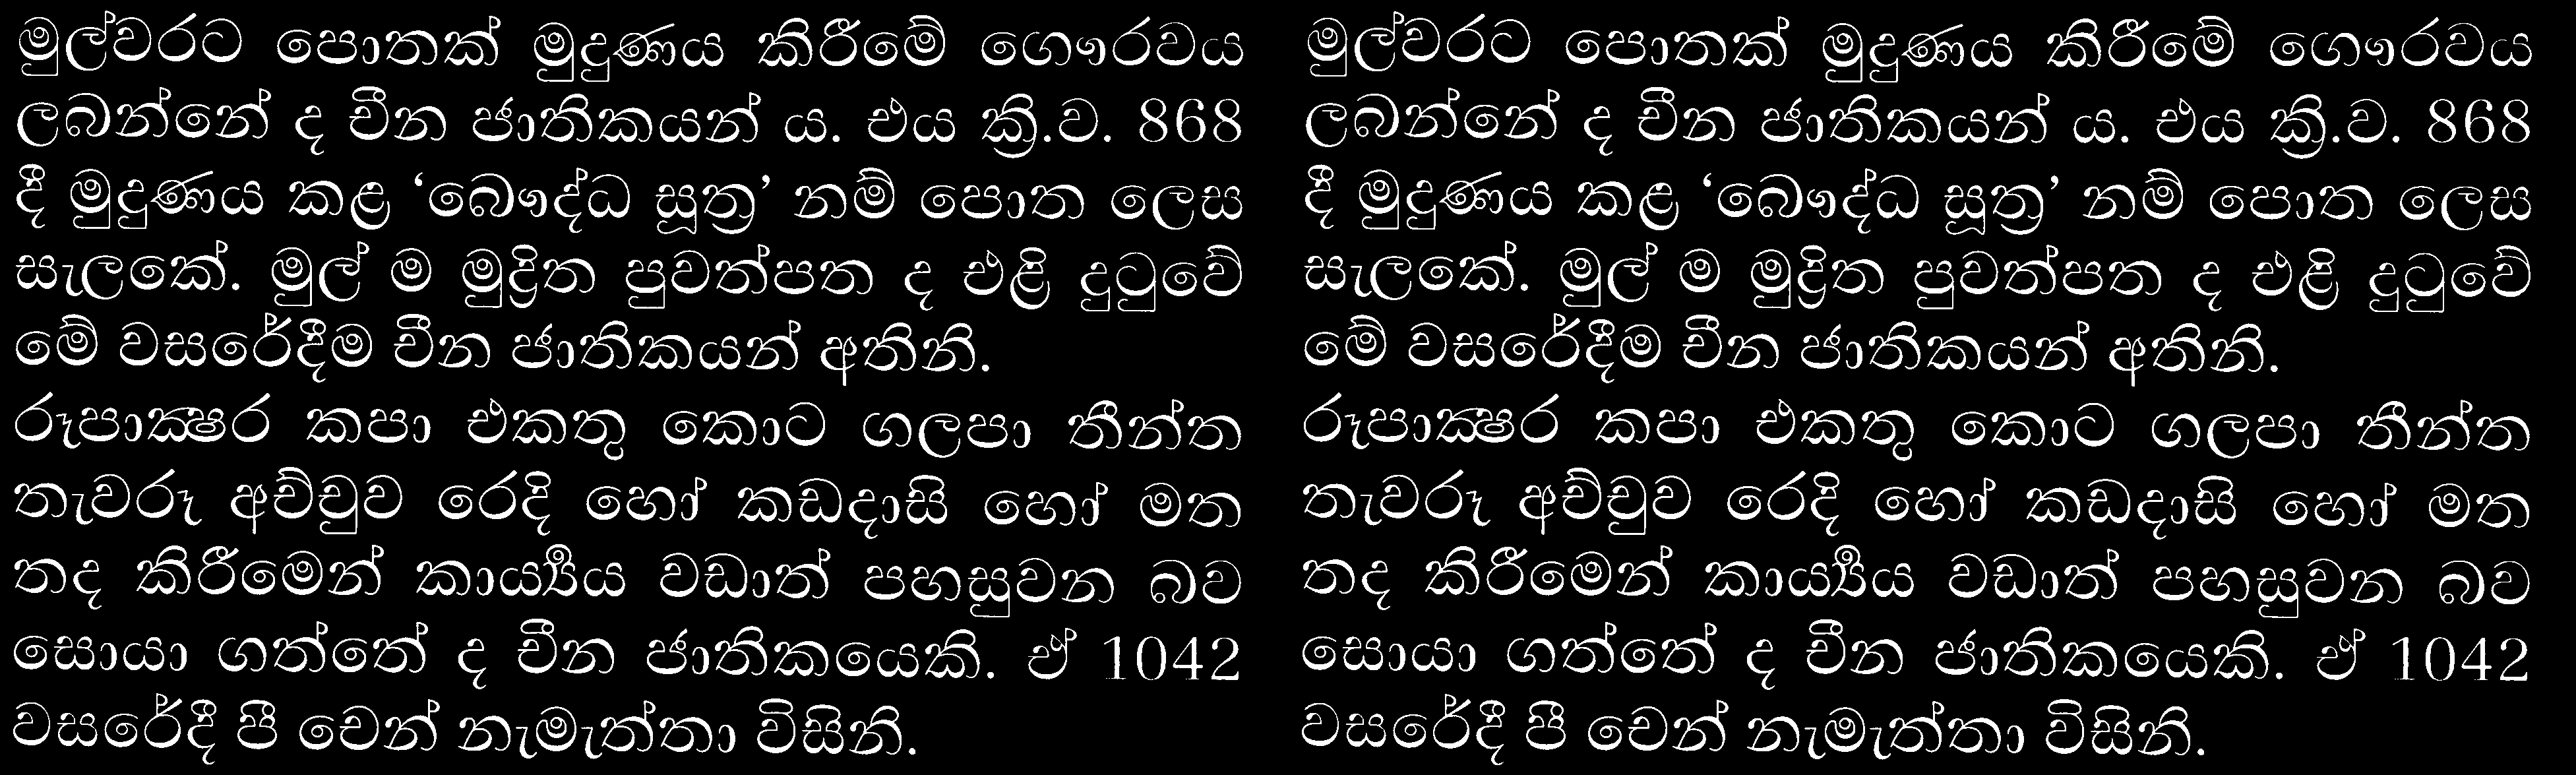

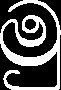

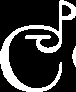

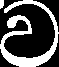

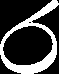

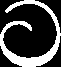

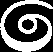

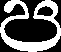

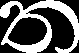

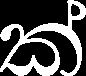

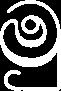

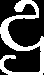

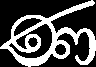

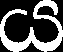

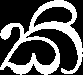

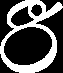

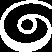

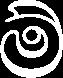

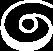

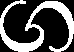

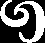

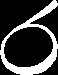

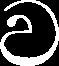

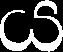

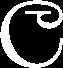

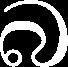

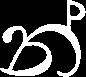

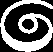

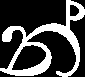

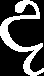

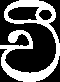

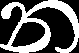

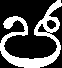

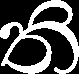

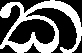

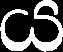

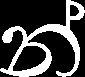

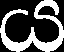

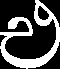

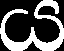

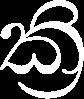

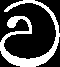

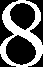

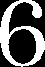

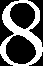

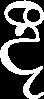

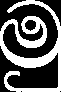

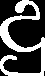

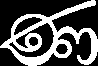

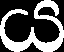

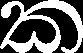

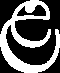

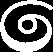

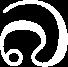

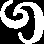

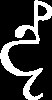

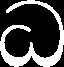

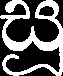

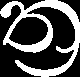

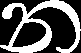

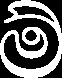

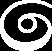

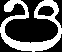

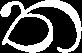

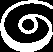

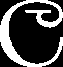

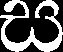

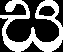

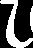

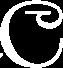

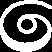

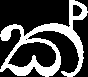

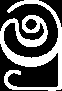

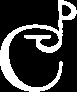

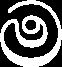

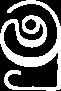

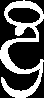

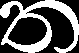

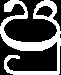

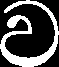

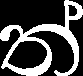

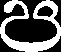

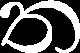

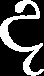

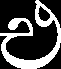

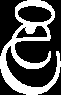

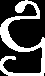

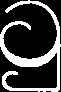

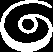

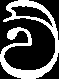

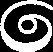

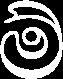

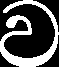

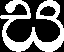

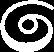

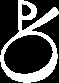

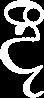

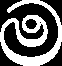

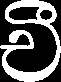

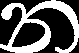

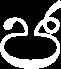

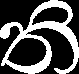

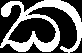

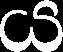

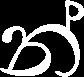

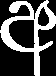

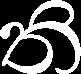

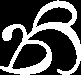

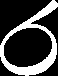

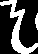

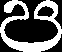

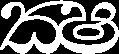

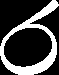

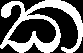

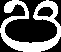

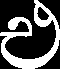

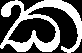

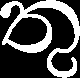

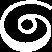

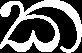

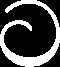

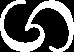

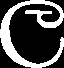

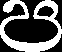

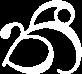

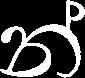

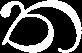

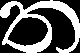

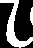

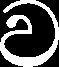

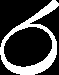

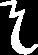

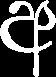

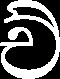

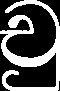

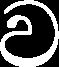

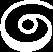

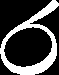

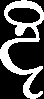

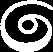

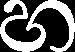

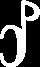

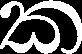

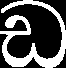

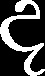

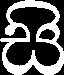

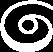

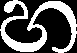

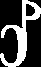

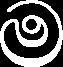

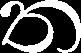

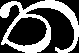

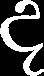

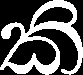

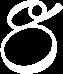

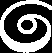

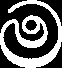

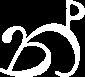

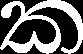

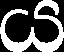

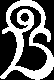

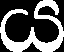

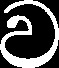

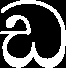

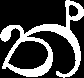

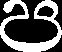

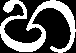

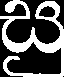

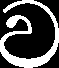

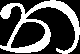

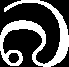

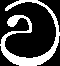

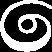

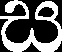

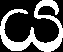

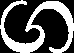

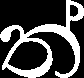

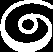

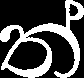

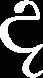

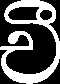

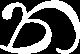

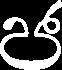

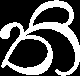

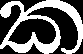

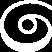

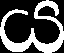

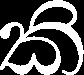

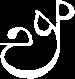

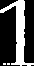

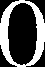

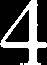

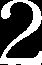

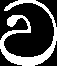

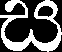

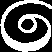

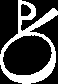

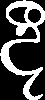

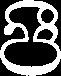

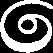

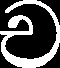

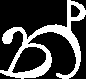

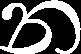

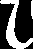

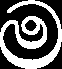

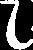

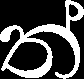

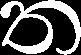

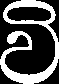

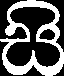

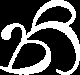

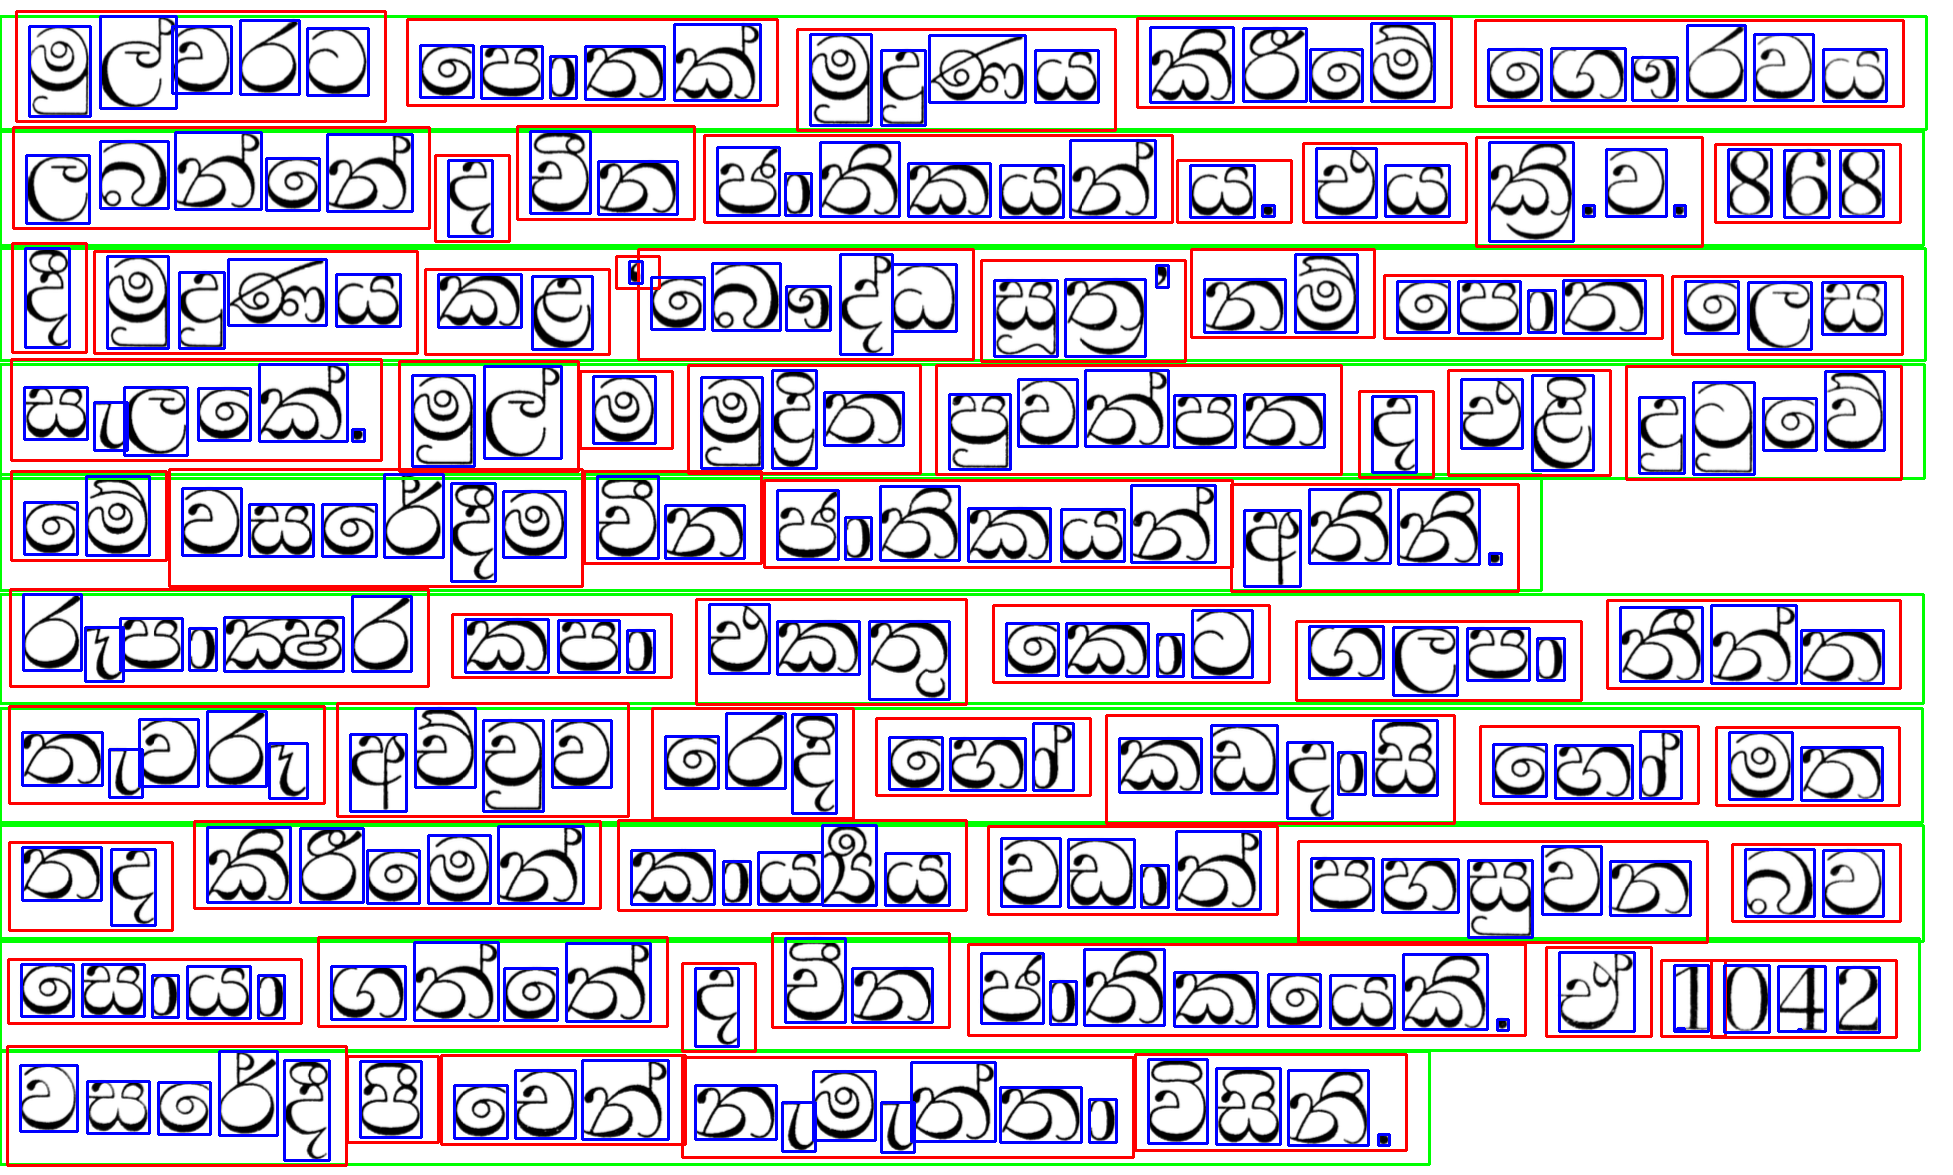

In [87]:
#@title { vertical-output: true}
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Step 1: Preprocess the image
image = cv2.imread('1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
clossing_img = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
dilated_thresh = cv2.dilate(thresh, kernel, iterations=1)
# Concatenate images horizontally
horizontal_concat = np.concatenate((thresh, clossing_img), axis=1)

# Display the concatenated images
cv2_imshow(horizontal_concat)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Step 2.0: Detect text lines
line_contours = line_contour_generate(dilated_thresh)
line_contours = sorted(line_contours, key=lambda ctr: cv2.boundingRect(ctr)[1])
# render_image(line_dilate)

correction = 5

# render_image(word_dilate)
word_blocks = []

# Draw bounding boxes around lines
for index ,line_contour in enumerate(line_contours):
  line_block = draw_bounding_rect(dilated_thresh, line_contour)
  word_contours= word_contour_generate(line_block)
  for word_contour in word_contours:
    word_block = draw_bounding_rect(line_block, word_contour)
    word_blocks.append(word_block)
    # render_image(word_block)
    char_contours, _ = cv2.findContours(word_block, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    char_contours = sorted(char_contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    for char_contour in char_contours:
      x, y, w, h = cv2.boundingRect(char_contour)
      char_block = word_block[y:y+h, x:x+w]
      render_image(char_block)


# Step 2.1: Detect text words
word_contours = word_contour_generate(dilated_thresh)
# Step 2.2: Detect text characters
char_contours, _ = cv2.findContours(dilated_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#  draw boxes for line contours
for contour in line_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Draw bounding boxes around words
for contour in word_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x-correction, y-correction), (x+w+correction, y+h+correction), (0, 0, 255), 2)  # Red for text blocks

# Draw bounding boxes around characters
for index , contour in enumerate(char_contours):
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)  # blue for text blocks
    # cv2.putText(image, str(index), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,0), 2)


# Display the image with bounding boxes
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
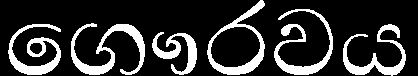

In [86]:
word_blocks[4]

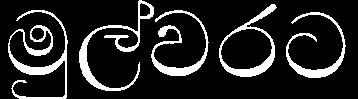

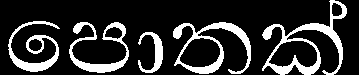

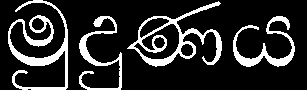

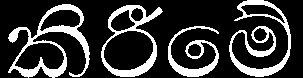

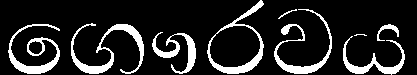

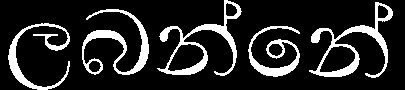

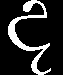

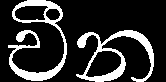

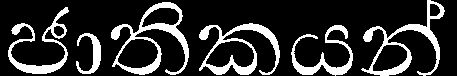

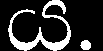

In [78]:
# for loop up to 10
for i in range(10):
  render_image(word_blocks[i])